In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Single Linear Regression

In [2]:
ds = pd.read_csv("housepred.csv")
ds

,Id,SalePrice
0,1461,105000.0
1,1462,172000.0
2,1463,189900.0
3,1464,195500.0
4,1465,191500.0
...,...,...
1454,2915,90500.0
1455,2916,71000.0
1456,2917,131000.0
1457,2918,132000.0


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


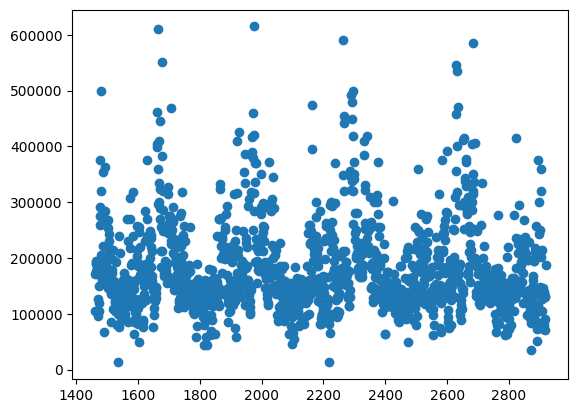

In [4]:
# data visualization
plt.scatter(ds["Id"],ds["SalePrice"])

In [5]:
# separate input and output 
x = ds.iloc[:,0:1]
y = ds.iloc[:,-1]

In [6]:
# separarte data oin training and testing (input and output)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 1094 to 897
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      1167 non-null   int64
dtypes: int64(1)
memory usage: 18.2 KB


In [8]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 899 to 1437
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      292 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [9]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1167 entries, 1094 to 897
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
1167 non-null   float64
dtypes: float64(1)
memory usage: 18.2 KB


In [10]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 292 entries, 899 to 1437
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
292 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


In [11]:
# import algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# fit model
model.fit(x_train,y_train)

LinearRegression()

In [13]:
# make prediction for comparison
y_pred = model.predict(x_test)

In [14]:
# import metrics to get prediction
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0011380320310561132

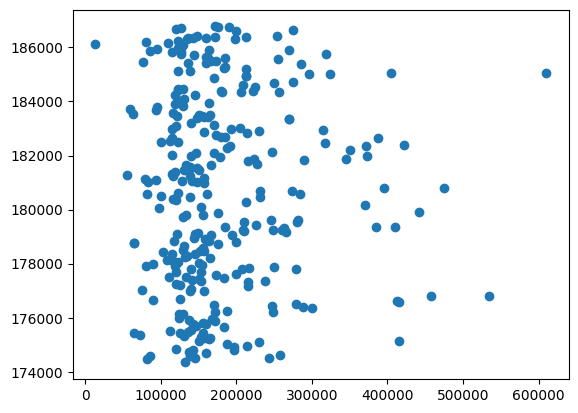

In [15]:
plt.scatter(y_test,y_pred)

# Multiple Linear Regression

In [62]:
df = pd.read_csv("AmesHousing.csv")
# df
# df.head(1)

In [63]:
# df.info()
# df.iloc[:,20:35]

In [64]:
# delete columnes from dataset 
df.drop(["Alley","Pool QC","Fence","Misc Feature","Fireplace Qu","Lot Area","Neighborhood","Condition 1","Condition 2","Exterior 1st",
         "Exterior 2nd","Order","PID","Pool Area","Screen Porch","3Ssn Porch","Enclosed Porch"],inplace=True,axis=1)

In [65]:
# df[df.isnull().any(axis=1)] ----- check null values
df.dropna(inplace=True)

In [66]:
x = df.iloc[:,3:11]

In [92]:
# convert categories data into numerical ---- using encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["MS Zoning"] = le.fit_transform(df["MS Zoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Lot Shape"] = le.fit_transform(df["Lot Shape"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["Land Contour"] = le.fit_transform(df["Land Contour"])
df["Lot Config"] = le.fit_transform(df["Lot Config"])
df["Land Slope"] = le.fit_transform(df["Land Slope"])
df["Bldg Type"] = le.fit_transform(df["Bldg Type"])
df["House Style"] = le.fit_transform(df["House Style"])
df["Roof Style"] = le.fit_transform(df["Roof Style"])
df["Roof Matl"] = le.fit_transform(df["Roof Matl"])
df["Exter Qual"] = le.fit_transform(df["Exter Qual"])
df["Exter Cond"] = le.fit_transform(df["Exter Cond"])
df["Foundation"] = le.fit_transform(df["Foundation"])
df["Bsmt Qual"] = le.fit_transform(df["Bsmt Qual"])
df["Bsmt Cond"] = le.fit_transform(df["Bsmt Cond"])
df["Bsmt Exposure"] = le.fit_transform(df["Bsmt Exposure"])
df["BsmtFin Type 1"] = le.fit_transform(df["BsmtFin Type 1"])
df["BsmtFin Type 2"] = le.fit_transform(df["BsmtFin Type 2"])
df["Heating"] = le.fit_transform(df["Heating"])
df["Heating QC"] = le.fit_transform(df["Heating QC"])
df["Central Air"] = le.fit_transform(df["Central Air"])
df["Electrical"] = le.fit_transform(df["Electrical"])
df["Kitchen Qual"] = le.fit_transform(df["Kitchen Qual"])
df["Functional"] = le.fit_transform(df["Functional"])
df["Fireplaces"] = le.fit_transform(df["Fireplaces"])
df["Garage Type"] = le.fit_transform(df["Garage Type"])
df["Garage Finish"] = le.fit_transform(df["Garage Finish"])
df["Garage Qual"] = le.fit_transform(df["Garage Qual"])
df["Garage Cond"] = le.fit_transform(df["Garage Cond"])
df["Paved Drive"] = le.fit_transform(df["Paved Drive"])
df["Sale Type"] = le.fit_transform(df["Sale Type"])
df["Sale Condition"] = le.fit_transform(df["Sale Condition"])

In [68]:
# df.info()

In [69]:
# separate input and output 
x = ds.iloc[:,0:64]
y = ds.iloc[:,-1]

In [70]:
# separarte data oin training and testing (input and output)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [71]:
# import algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
# fit model
model.fit(x_train,y_train)

LinearRegression()

In [73]:
# make prediction for comparison
y_pred = model.predict(x_test)

In [74]:
# import metrics to get prediction
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

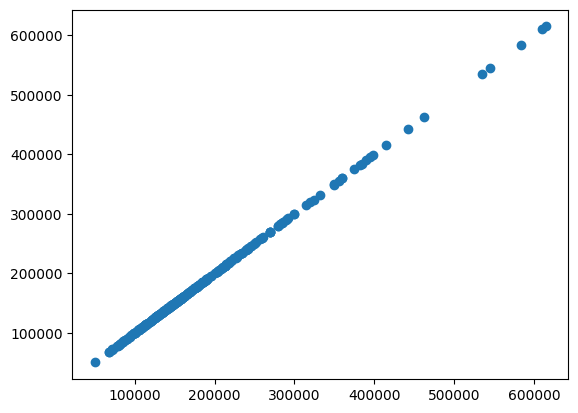

In [75]:
plt.scatter(y_test,y_pred)

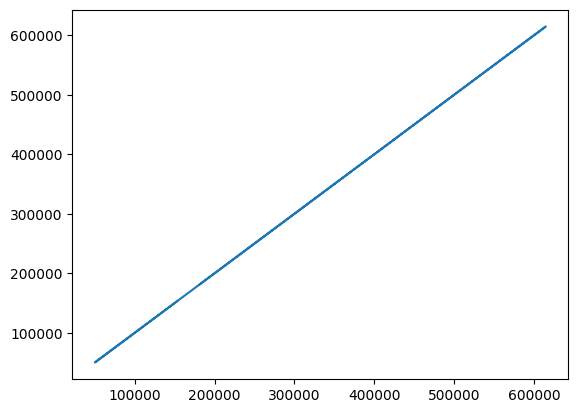

In [76]:
plt.plot(y_test,y_pred)

# Using Decision Tree Algorithm

In [77]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [78]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [79]:
y_pre = model.predict(x_test)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pre)

0.9959399636390022

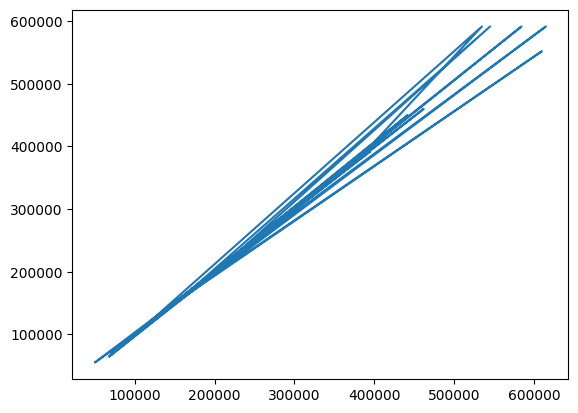

In [81]:
plt.plot(y_test,y_pre)

# Using Random Forest Algorithm

In [82]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [83]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
y_p = model.predict(x_test)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test,y_p)

0.9980854137603312

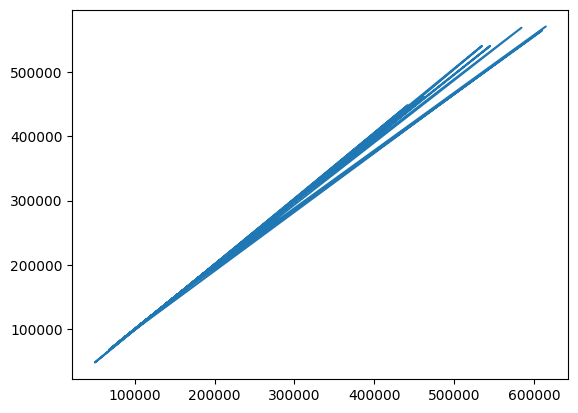

In [91]:
plt.plot(y_test,y_p)